In [1]:
import pandas as pd
import glob

# Tentukan path ke folder dataset
folder_path = '../tweets-data/timnas/'

# Buat pola untuk mencocokkan file CSV di dalam folder
file_pattern = '*.csv'

# Gunakan modul glob untuk mendapatkan daftar file yang sesuai dengan pola
file_list = glob.glob(folder_path + file_pattern)

# Buat list kosong untuk menyimpan DataFrame dari setiap file CSV
dfs = []

# Loop melalui setiap file dan baca sebagai DataFrame, lalu tambahkan ke list
for file in file_list:
    df = pd.read_csv(file, sep=",")
    dfs.append(df)

# Gabungkan semua DataFrame menjadi satu
df = pd.concat(dfs, ignore_index=True)
df.to_csv("filtered_tweets_timnas.csv", index=False, encoding="utf-8")

In [2]:
df.head(1)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,...,8,36,181,in,46693036,1750673537566986516.1,inilahdotcom,https://twitter.com/inilahdotcom/status/1750673537566986516,https://pbs.twimg.com/ext_tw_video_thumb/1750672983222611968/pu/img/n9uHg0oFqaod9xId.jpg,Unnamed: 13
0,Wed Jan 24 13:35:44 +0000 2024,1.750150e+18,Timnas Indonesia pas pulang ke Asean #TimnasDa...,15.0,16.0,120.0,1122.0,in,1.585945e+18,1.750150e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Specify the file path for the CSV file
# file_pathnan = "../tweets-data/Combined-File/combined.csv"
file_pathnan = "filtered_tweets_timnas.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_pathnan, encoding="utf-8")

# Drop rows with NaN values in the 'full_text' column
df.dropna(subset=['full_text'], inplace=True)

# Create a new DataFrame 'df_pre' from the 'full_text' column
df_full_text = df[['full_text']].reset_index(drop=True)

# # Save the new DataFrame to a new CSV file
df_full_text.to_csv("data_nonNan.csv", index=False, encoding="utf-8")


In [4]:
df_full_text['full_text'][0]

'Timnas Indonesia pas pulang ke Asean #TimnasDay https://t.co/BZX3fRd7VF'

In [5]:
# Mencari nilai NaN di kolom 'tweet' menggunakan isna() dan menghitung jumlahnya
nan_count = df_full_text['full_text'].isna().sum()

# Menampilkan jumlah nilai NaN
print("Jumlah nilai NaN:", nan_count)

Jumlah nilai NaN: 0


In [6]:
# Pengecekan dan perhitungan jumlah nilai kosong di kolom 'full_text'
jumlah_nilai_kosong = (df_full_text['full_text'] == '').sum()

print(f"Jumlah nilai kosong di kolom 'full_text': {jumlah_nilai_kosong}")

Jumlah nilai kosong di kolom 'full_text': 0


In [7]:
import pandas as pd

# Define the file path
file_pathnonnan = "data_nonNan.csv"

# Define the keyword you want to filter by
keyword = "timnas"  # Change this to your desired keyword

# Read the CSV file into a DataFrame with proper encoding
df = pd.read_csv(file_pathnonnan, encoding="utf-8")

# Filter the DataFrame to only include rows where the 'full_text' column contains the keyword
filtered_df = df[df['full_text'].str.contains(keyword, case=False, na=False)]

# Define the output file path based on the keyword
output_file_path = f"filtered_tweets_{keyword}.csv"

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file_path, index=False)

# Display a message indicating where the filtered data is saved
print(f"Filtered tweets with keyword '{keyword}' are saved to '{output_file_path}'")


Filtered tweets with keyword 'timnas' are saved to 'filtered_tweets_timnas.csv'


In [8]:
import re
from deep_translator import GoogleTranslator
from nltk.corpus import  stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('@')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    text = text.lower()
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

def ubah_angka(text):
    text = text.lower()
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    text = text.lower()
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return re.sub(r'https\S+|www\S+|https\S+', '', text)

# Fungsi untuk mengganti singkatan dengan nilai sesuai dari kamus
def ganti_singkatan(text):
    text = text.lower()
    # Baca kamus slangword dari file teks
    slangword_path = 'kbba_2.txt'
    with open(slangword_path, 'r') as file:
        slangword_dict = dict(line.strip().split(':') for line in file)

    words = text.split()
    for i, word in enumerate(words):
        if word in slangword_dict:
            words[i] = slangword_dict[word]
    return ' '.join(words)

def translate_bahasa(text) :
    return GoogleTranslator(source='auto', target='en').translate(text)

# remove english stopwords function
def remove_stopwords(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

def stopwords_indo(text):
    text = text.lower()
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan', 'ia','bahwa','oleh']
    stop_factory.get_stop_words()+more_stopword
    stopword = stop_factory.create_stop_word_remover()
    return stopword.remove(text)

def stemming(text):
    # text = text.lower()
    # Fact = StemmerFactory()
    # Stemmer = Fact.create_stemmer()
    # return Stemmer.stem(text)
    ps = PorterStemmer()
    return ps.stem(text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['pak','apa','eh','dia','lagi','kok','nya','juga','cuma','kayak','jadi','dengan','kes','lah','pas','iya','kamu','aku','id','amp','deh','tanyakanrl','tanyarlfes','sih','ie','na','si','rj','lc','oi','oo','ar','oe','al','sm','ri','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus


# Preprocessing kolom 'text'
df_full_text['full_text'] = df_full_text['full_text'].apply(remove_punctuation)
df_full_text['full_text'] = df_full_text['full_text'].apply(remove_tag)
df_full_text['full_text'] = df_full_text['full_text'].apply(ubah_angka)
df_full_text['full_text'] = df_full_text['full_text'].apply(remove_number)
df_full_text['full_text'] = df_full_text['full_text'].apply(remove_links)
df_full_text['full_text'] = df_full_text['full_text'].apply(ganti_singkatan)
# df_full_text['full_text'] = df_full_text['full_text'].apply(translate_bahasa)
df_full_text['full_text'] = df_full_text['full_text'].apply(stopwords_indo)
# df_full_text['full_text'] = df_full_text['full_text'].apply(stopwords_indo)
# df_full_text['full_text'] = df_full_text['full_text'].apply(stemming)
df_full_text['full_text'] = df_full_text['full_text'].apply(remove_single_letter_words)

# Menampilkan DataFrame setelah preprocessing
df_full_text.head(2)

,full_text
0,timnas indonesia pulang asean timnasday
1,bangga sama timnas jawabannya lihatlah penduku...


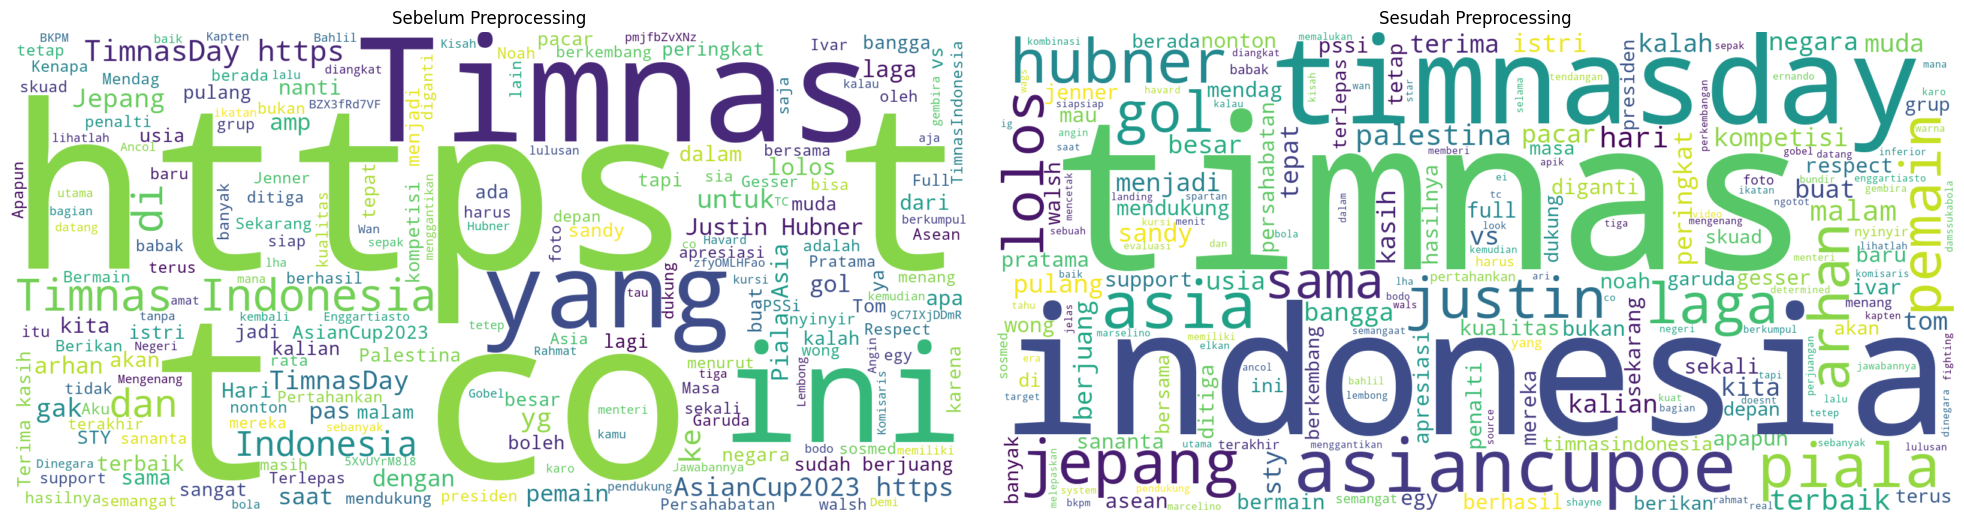

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Baca file CSV sebelum preprocessing
file_path_before = "filtered_tweets_timnas.csv"
df_before = pd.read_csv(file_path_before, encoding="utf-8")

# Ubah kolom 'full_text' ke string dan tangani nilai NaN
df_before['full_text'] = df_before['full_text'].astype(str)
df_full_text['full_text'] = df_full_text['full_text'].astype(str)

# Gabungkan semua teks tweet menjadi satu string
combined_text_before = ' '.join(df_before['full_text'])
combined_text_after = ' '.join(df_full_text['full_text'])

# Buat objek WordCloud untuk sebelum dan sesudah preprocessing
wordcloud_before = WordCloud(width=1600, height=800, background_color='white').generate(combined_text_before)
wordcloud_after = WordCloud(width=1600, height=800, collocations=False, background_color='white').generate(combined_text_after)

# Tampilkan gambar Word Cloud secara bersampingan
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title('Sebelum Preprocessing')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title('Sesudah Preprocessing')

plt.tight_layout(pad=2)
plt.show()



In [10]:
# Save the new DataFrame to a new CSV file
df_full_text.to_csv("data_cleaned.csv", index=False, encoding="utf-8")